In [265]:
    Authors: jtyalor && vinguyen

SyntaxError: invalid syntax (<ipython-input-265-ca79f47bcd5c>, line 1)

#import numpy as np

1. Create a matrix of random values of a distribution of your choice.

In [266]:
import numpy as np
a = np.random.rand(3,4)
print(a)

[[0.58945397 0.41870404 0.93458061 0.84449098]
 [0.42851594 0.78564233 0.36824495 0.98110918]
 [0.77265359 0.04387724 0.2536306  0.8086237 ]]


2. Create a 1-dimensional array of 12 sequential numbers and convert it to a 4x3 array.

In [267]:
import numpy as np
a = np.arange(1,13)
print("1d array")
print(a)
b = a.reshape(4, 3)
print("4x3 matrix")
print(b)

1d array
[ 1  2  3  4  5  6  7  8  9 10 11 12]
4x3 matrix
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


3. Write a function that creates an incremental array of dimension (1,n) with values between 0 and 1. Use arr.shape to verify

In [268]:
def a_very_usefull_function(n):
    return np.full((1,n), np.linspace(0,1,n))
a = a_very_usefull_function(15)
print(a)
a.shape

[[0.         0.07142857 0.14285714 0.21428571 0.28571429 0.35714286
  0.42857143 0.5        0.57142857 0.64285714 0.71428571 0.78571429
  0.85714286 0.92857143 1.        ]]


(1, 15)

4. Generate a 10x12 array and extract row 0-4 of columns 8-12.

In [269]:
a = np.full((10,12), np.linspace(0,11,12))
print("full matrix")
print(a)
#grab by slices rows 0-4 col 8 9 10 && 11
b = a[0:4:1, [8,9,10,11]]
print("sub matrix")
print(b)

full matrix
[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]]
sub matrix
[[ 8.  9. 10. 11.]
 [ 8.  9. 10. 11.]
 [ 8.  9. 10. 11.]
 [ 8.  9. 10. 11.]]


5. Using the function in Q3, get m vectors and bind them together (to have a m x n) matrix.
Plot the matrix with matplotlib’s imshow

[[0.         0.01010101 0.02020202 ... 0.97979798 0.98989899 1.        ]
 [0.         0.01010101 0.02020202 ... 0.97979798 0.98989899 1.        ]
 [0.         0.01010101 0.02020202 ... 0.97979798 0.98989899 1.        ]
 ...
 [0.         0.01010101 0.02020202 ... 0.97979798 0.98989899 1.        ]
 [0.         0.01010101 0.02020202 ... 0.97979798 0.98989899 1.        ]
 [0.         0.01010101 0.02020202 ... 0.97979798 0.98989899 1.        ]]


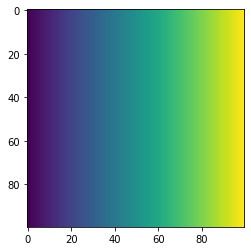

In [270]:
#what question wants
import matplotlib.pyplot as plot
size_1 = 100;
size_2 = 100;
a = np.full((size_1,size_2), a_very_usefull_function((size_1)))
a_plot = np.matrix(a)
print(a_plot)
plot.imshow(a_plot)


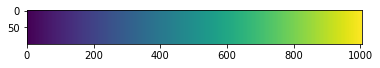

In [271]:
#so i can learn
size_2 = 1004
#c = np.full((size_1), a_very_usefull_function((size_1)))
#d = np.full((size_2), a_very_usefull_function((size_2)))
#c.resize(d.shape)# if (c < d) else d.resize(c.shape)
e = np.full((size_1,size_2), a_very_usefull_function((size_2)))
# print(e)
#print(c)
#print(d)
# print(e)
e_plot = np.matrix(e)
#e_plot = np.matrix(e);
plot.imshow(e_plot)

6. Multiply the resulting matrix from Q5 with the matrix of a picture of your choice.
Plot the resulting matrix.

base image


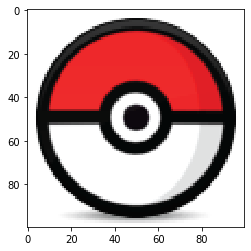

In [272]:
#imread nativly works with .png , change to handle more extensions ?
img = plot.imread("test.png")
print("base image")
plot.imshow(img)


new image


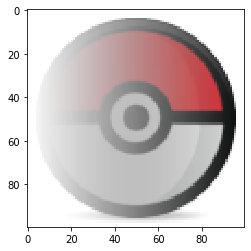

In [273]:
# so the broadcasting (matrix operators) are compatible when
#they are equal, or
#one of them is 1

#this requires the shapes of the two to be the same
#so you have to tailer the matrix to the img dimensions
#0 - 3 axis because rgba
for i in range(0, 4):
    img[:,:,i] *= a_plot
print("new image")
plot.imshow(img)

    Part 2: The fun part  *Filters.
Image editing / processing is done by changing the values of the matrix (pixel by pixel).
In this section you will code FOUR (non-grayscale) commonly used image filters.
Filters to choose from:
• Amaro  
• Mayfair  
• Rise  
• Hudson  
• Valencia  
• X-Pro II  
• Nashville  
• Lo-Fi  
• Sierra  
• Earlybird  
• Sutro  
• Toaster  

In [274]:
# first we want to make a suite of generic helper functions to be reused

#todo -
# change the mat_* functions to not use for loops cause they're really slow in python

#these should take the img (a) the mask (b) and the y/x limits of the img
#always compares a to b
def mat_add(a,b,lim1,lim2):
    # new array with the y/x dimensions of the input img
    ret = np.zeros((a.shape[0],a.shape[1]))
    for i in range(0,lim1):
        for j in range(0,lim2):
            ret[i][j] = a[i][j] + b[i][j]
            j = j + 1
        i = i + 1
    return (ret)
def mat_dif(a,b,lim1,lim2):
    # new array with the y/x dimensions of the input img
    ret = np.zeros((a.shape[0],a.shape[1]))
    for i in range(0,lim1):
        for j in range(0,lim2):
            ret[i][j] = a[i][j] - b[i][j]
            j = j + 1
        i = i + 1
    return (ret)
def mat_mult(a,b,lim1,lim2):
    # new array with the y/x dimensions of the input img
    ret = np.zeros((a.shape[0],a.shape[1]))
    for i in range(0,lim1):
        for j in range(0,lim2):
            ret[i][j] = a[i][j] * b[i][j]
            j = j + 1
        i = i + 1
    return (ret)
#throws runtime warnings
def mat_div(a,b,lim1,lim2):
    # new array with the y/x dimensions of the input img
    ret = np.zeros((a.shape[0],a.shape[1]))
    for i in range(0,lim1):
        for j in range(0,lim2):
            ret[i][j] = a[i][j] / b[i][j]
            j = j + 1
        i = i + 1
    return (ret)
#throws runtime warnings
def mat_mod(a,b,lim1,lim2):
    # new array with the y/x dimensions of the input img
    ret = np.zeros((a.shape[0],a.shape[1]))
    for i in range(0,lim1):
        for j in range(0,lim2):
            ret[i][j] = a[i][j] % b[i][j]
            j = j + 1
        i = i + 1
    return (ret)
#split and merge rgb values
#i love being able to return multiple things
def split_rgb(img):
    img_R = img[:,:,0]
    img_G = img[:,:,1]
    img_B = img[:,:,2]
    return img_R,img_G,img_B
def merge_rgb(img_R,img_G,img_B):
    #axis is 2 because we split like this img_R = img[:,:,0]
    ret = np.stack([img_R,img_G,img_B],axis=2)
    return ret
#protect against clipping warning message
#mayber redundent?
def lim_for_uint8(img_R,img_G,img_B):
    lim1 = img_R.shape[0]
    lim2 = img_R.shape[1]
    for i in range(0,lim1):
        for j in range(0,lim2):
            if (img_R[i][j] > 255):
                img_R[i][j] = 255
            if (img_G[i][j] > 255):
                img_G[i][j] = 255
            if (img_B[i][j] > 255):
                img_B[i][j] = 255
            j = j + 1
        i = i + 1
    return (img_R,img_G,img_B)
#put image
def out_img_RGB(r,g,b):
    r,g,b = lim_for_uint8(r,g,b)
    tmp = merge_rgb(r,g,b)
    output_img(tmp)
def output_img(img):
    plot.axis('off')
    plot.imshow((img * 255).astype(np.uint8),interpolation="none",)
    #plot.imshow(img)    tmp = merge_rgb(r,g,b)

    Test masks:
mostly to understand how the image is actually stored

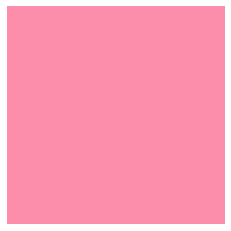

In [275]:
img = plot.imread("flamingo.png")
plot.axis('off')
plot.imshow(img)

In [276]:
#im sure the reason it loses the whitespace is something really dumb
def test_mask_add(img):
    r,g,b = split_rgb(img)
    #output_img(img)
    #this is pretty bad and im not sure why it changes all the outer white to black
    b = mat_add(b,b,b.shape[0],b.shape[1])
    #tmp = merge_rgb(r, g, b)
    #output_img(tmp)
    #tmp = merge_rgb(r, g, b)
    out_img_RGB(r,g,b)
    return

#test_mask_add(img)

In [277]:
def test_mask_mul(img):
    r,g,b = split_rgb(img)
    r = mat_mult(r,r,r.shape[0],r.shape[1])
    out_img_RGB(r,g,b)
    return
#test_mask_mul(img)

In [278]:
def test_mask_div(img):
    r,g,b = split_rgb(img)
    r = mat_div(r,r,r.shape[0],r.shape[1])
    out_img_RGB(r,g,b)
    return
#test_mask_div(img)

In [279]:
def test_mask_mod(img):
    r,g,b = split_rgb(img)
    r = mat_mod(r,r,r.shape[0],r.shape[1])
    out_img_RGB(r,g,b)
    return
#test_mask_mod(img)

In [280]:
def mesh_grid_mult(a,mg,mul_in,mul_out):
    for i in range(0,a.shape[0]):
        for j in range(0,a.shape[1]):
            if (mg[i][j] and a[i][j] ):
                a[i][j] *= mul_in
            else:
                a[i][j] *= mul_out
            j = j + 1
        i = i + 1
    return a
#corners are bright and gets darker towards the inner mesh
def mesh_grid_mult_darken_from_corner_mul(a,mg,mul_in,mul_out):
    tmpy = a.shape[0]
    tmpx = a.shape[1]
    toggle_x = 0
    toggle_y = 0

    for i in range(0,a.shape[0]):
        if (i == tmpy / 2):
            toggle_y = 1
        toggle_x = 0
        for j in range(0,a.shape[1]):
            if (mg[i][j] and a[i][j] ):
                a[i][j] *= mul_in
            else:#could use a switch case but overkill
                if (not toggle_x and j >= (tmpx / 2)):
                    toggle_x = 1
                if (not toggle_x and not toggle_y):
                    a[i][j] *= (mul_out * (1 - ((j / (tmpx)) + ((i / (tmpy))))))
                elif (toggle_x and not toggle_y):
                    a[i][j] *= (mul_out * (1 - ((1 - (j / (tmpx))) + ((i / (tmpy))))))
                elif (not toggle_x and toggle_y):
                    a[i][j] *= (mul_out * (1 - ((j / (tmpx)) + (1 - (i / (tmpy))))))
                elif (toggle_x and toggle_y):
                    a[i][j] *= (mul_out * (1 - (((1 - (j / tmpx)) + (1 - (i / (tmpy)))))))
                else:
                    a[i][j] *= mul_out
            j = j + 1
        i = i + 1
    return a
def mesh_grid_mult_darken_to_corner_mul(a,mg,mul_in,mul_out):
    tmpy = a.shape[0]
    tmpx = a.shape[1]
    toggle_x = 0
    toggle_y = 0

    for i in range(0,a.shape[0]):
        if (i == tmpy / 2):
            toggle_y = 1
        toggle_x = 0
        for j in range(0,a.shape[1]):
            if (mg[i][j] and a[i][j] ):
                a[i][j] *= mul_in
            else:#could use a switch case but overkill
                if (not toggle_x and j >= (tmpx / 2)):
                    toggle_x = 1
                if (not toggle_x and not toggle_y):
                    a[i][j] *= (mul_out * (((j / (tmpx)) + ((i / (tmpy))))))
                elif (toggle_x and not toggle_y):
                    a[i][j] *= (mul_out * (((1 - (j / (tmpx))) + ((i / (tmpy))))))
                elif (not toggle_x and toggle_y):
                    a[i][j] *= (mul_out * (((j / (tmpx)) + (1 - (i / (tmpy))))))
                elif (toggle_x and toggle_y):
                    a[i][j] *= (mul_out * ((((1 - (j / tmpx)) + (1 - (i / (tmpy)))))))
                else:
                    a[i][j] *= mul_out
            j = j + 1
        i = i + 1
    return a

In [281]:
#this is pulled from above and i don't feel like changing the var names
def mesh_grid_add(a,mg,mul_in,mul_out):
    for i in range(0,a.shape[0]):
        for j in range(0,a.shape[1]):
            if (mg[i][j] and a[i][j] ):
                a[i][j] += mul_in
            else:
                a[i][j] += mul_out
            j = j + 1
        i = i + 1
    return a
#corners are bright and gets darker towards the inner mesh
def mesh_grid_mult_darken_from_corner_add(a,mg,mul_in,mul_out):
    tmpy = a.shape[0]
    tmpx = a.shape[1]
    toggle_x = 0
    toggle_y = 0

    for i in range(0,a.shape[0]):
        if (i == tmpy / 2):
            toggle_y = 1
        toggle_x = 0
        for j in range(0,a.shape[1]):
            if (mg[i][j] and a[i][j] ):
                a[i][j] *= mul_in
            else:#could use a switch case but overkill
                if (not toggle_x and j >= (tmpx / 2)):
                    toggle_x = 1
                if (not toggle_x and not toggle_y):
                    a[i][j] += (mul_out * (1 - ((j / (tmpx)) + ((i / (tmpy))))))
                elif (toggle_x and not toggle_y):
                    a[i][j] += (mul_out * (1 - ((1 - (j / (tmpx))) + ((i / (tmpy))))))
                elif (not toggle_x and toggle_y):
                    a[i][j] += (mul_out * (1 - ((j / (tmpx)) + (1 - (i / (tmpy))))))
                elif (toggle_x and toggle_y):
                    a[i][j] += (mul_out * (1 - (((1 - (j / tmpx)) + (1 - (i / (tmpy)))))))
                else:
                    a[i][j] += mul_out
            j = j + 1
        i = i + 1
    return a
def mesh_grid_mult_darken_to_corner_add(a,mg,mul_in,mul_out):
    tmpy = a.shape[0]
    tmpx = a.shape[1]
    toggle_x = 0
    toggle_y = 0

    for i in range(0,a.shape[0]):
        if (i == tmpy / 2):
            toggle_y = 1
        toggle_x = 0
        for j in range(0,a.shape[1]):
            if (mg[i][j] and a[i][j] ):
                a[i][j] *= mul_in
            else:#could use a switch case but overkill
                if (not toggle_x and j >= (tmpx / 2)):
                    toggle_x = 1
                if (not toggle_x and not toggle_y):
                    a[i][j] += (mul_out * (((j / (tmpx)) + ((i / (tmpy))))))
                elif (toggle_x and not toggle_y):
                    a[i][j] += (mul_out * (((1 - (j / (tmpx))) + ((i / (tmpy))))))
                elif (not toggle_x and toggle_y):
                    a[i][j] += (mul_out * (((j / (tmpx)) + (1 - (i / (tmpy))))))
                elif (toggle_x and toggle_y):
                    a[i][j] += (mul_out * ((((1 - (j / tmpx)) + (1 - (i / (tmpy)))))))
                else:
                    a[i][j] += mul_out
            j = j + 1
        i = i + 1
    return a

In [282]:
#makes the circle mask to get the whole image just square the .shape[] in the circle compute
#the actual circle mesh is a grid the same size as the image with each pos as a boolean
# params::
    #r,g,b the color matrixs
    #r_in,r_out ... the multiplyer for each color for inside the circle mesh
def inner_circle_mask(r,g,b,r_in,r_out,g_in,g_out,b_in,b_out,opt,mode):
    xx,yy = np.mgrid[:r.shape[0],:r.shape[1]]
    circle = (xx - r.shape[1]/2) ** 2 + (yy - r.shape[0]/2) ** 2
    circle = np.logical_and(circle < (r.shape[0] ** 1.6), circle < (r.shape[1] ** 1.6))
    for i in range(0,r.shape[0]):
        for j in range(0,r.shape[1]):
            if (circle[i][j]):
                circle[i][j] = 1
            else:
                circle[i][j] = 0
            j += 1
        i += 1
    if (mode == 0):#add
        if (opt == 1):
            r = mesh_grid_mult_darken_from_corner_add(r,circle,r_in,r_out)
            g = mesh_grid_mult_darken_from_corner_add(g,circle,g_in,g_out)
            b = mesh_grid_mult_darken_from_corner_add(b,circle,b_in,b_out)
        elif (opt == 2):
            r = mesh_grid_mult_darken_to_corner_add(r,circle,r_in,r_out)
            g = mesh_grid_mult_darken_to_corner_add(g,circle,g_in,g_out)
            b = mesh_grid_mult_darken_to_corner_add(b,circle,b_in,b_out)
        else:
            r = mesh_grid_add(r,circle,r_in,r_out)
            g = mesh_grid_add(g,circle,g_in,g_out)
            b = mesh_grid_add(b,circle,b_in,b_out)
    elif (mode == 1):#mult
        if (opt == 1):
            r = mesh_grid_mult_darken_from_corner_mul(r,circle,r_in,r_out)
            g = mesh_grid_mult_darken_from_corner_mul(g,circle,g_in,g_out)
            b = mesh_grid_mult_darken_from_corner_mul(b,circle,b_in,b_out)
        elif (opt == 2):
            r = mesh_grid_mult_darken_to_corner_mul(r,circle,r_in,r_out)
            g = mesh_grid_mult_darken_to_corner_mul(g,circle,g_in,g_out)
            b = mesh_grid_mult_darken_to_corner_mul(b,circle,b_in,b_out)
        else:
            r = mesh_grid_mult(r,circle,r_in,r_out)
            g = mesh_grid_mult(g,circle,g_in,g_out)
            b = mesh_grid_mult(b,circle,b_in,b_out)
   # r = mat_mult(r,circle,r.shape[0],r.shape[1])
   # g = mat_mult(g,circle,g.shape[0],g.shape[1])
   # b = mat_mult(b,circle,b.shape[0],b.shape[1])
    return r,g,b


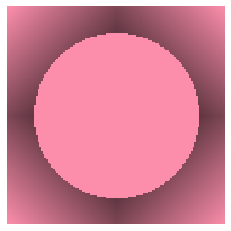

In [283]:
#once you have the functions to make the filter meshes you can plug in
#  whatever values you want ,
#  this is usefull  because a lot og the filters do something to the center
#  of the photo and something else to the edges of the photo
# the basic rundown is split the rgb color streams
    #apply the mask to each color stream seperately
    #output the img
NO_SHAPE_FILTER = 0
FROM_CORNER = 1
TO_CORNER = 2
ADD_MODE = 0
MUL_MODE = 1

def test_inner_circle_mask(img):
    r,g,b = split_rgb(img)
    r,g,b = inner_circle_mask(r,g,b,1,1,1,1,1,1,FROM_CORNER,MUL_MODE)
    out_img_RGB(r,g,b)
    return
test_inner_circle_mask(img) 

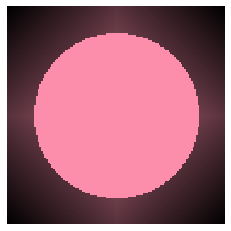

In [284]:
#testing the darken_to corner
img = plot.imread("flamingo.png")
def test_inner_circle_mask_2(img):
    r,g,b = split_rgb(img)
    r,g,b = inner_circle_mask(r,g,b,1,.7,1,.7,1,.7,TO_CORNER,MUL_MODE)
    out_img_RGB(r,g,b)
    return
test_inner_circle_mask_2(img) 

*Now for the actual filters*

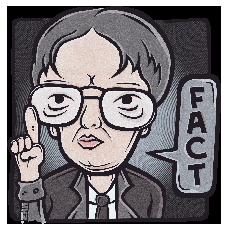

In [285]:
#the base image
def display_base():
    img = plot.imread("schrute.png")
    r,g,b = split_rgb(img)
    out_img_RGB(r,g,b)
    return
display_base()

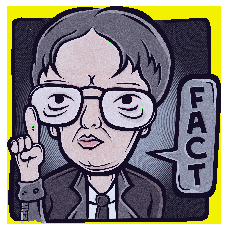

In [286]:
#Rise is just adding yellow tones 
#base yellow is 1:1 r:g
img = plot.imread("schrute.png")
def filter_rise(img):
    r,g,b = split_rgb(img)
    r,g,b = inner_circle_mask(r,g,b,15,15,15,15,0,0,NO_SHAPE_FILTER,ADD_MODE)
    out_img_RGB(r,g,b)
    return
filter_rise(img) 

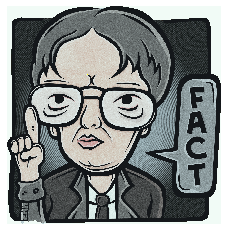

In [287]:
#Nashville is adding purple pink hues
#purple pink is \#d982b5 but im going to use 3:1:2
img = plot.imread("schrute.png")
def filter_nashville(img):
    r,g,b = split_rgb(img)
    r,g,b = inner_circle_mask(r,g,b,15,15,5,5,10,10,NO_SHAPE_FILTER,ADD_MODE)
    out_img_RGB(r,g,b)
    return
filter_nashville(img) 

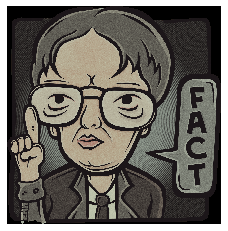

In [288]:
#Earlybird has soft faded colors and a hint of yellow
img = plot.imread("schrute.png")
def filter_earlybird(img):
    r,g,b = split_rgb(img)
    r,g,b = inner_circle_mask(r,g,b,.8,.8,.8,.8,.7,.7,NO_SHAPE_FILTER,MUL_MODE)
    out_img_RGB(r,g,b)
    return
filter_earlybird(img)

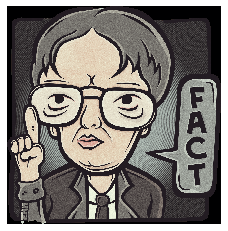

In [289]:
#sierra addes bluish tones while emphasizing darks and yellows
img = plot.imread("schrute.png")
def filter_sierra(img):
    r,g,b = split_rgb(img)
    r,g,b = inner_circle_mask(r,g,b,0,0,0,0,10,10,NO_SHAPE_FILTER,ADD_MODE)
    r,g,b = inner_circle_mask(r,g,b,1,1,1,1,.9,.9,NO_SHAPE_FILTER,MUL_MODE)
    r,g,b = inner_circle_mask(r,g,b,0,0,0,0,-10,-10,NO_SHAPE_FILTER,ADD_MODE)
    out_img_RGB(r,g,b)
    return
filter_sierra(img)

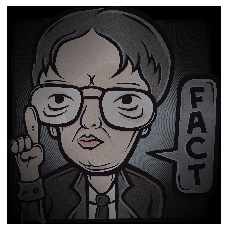

In [290]:
#Mayfair adds warm pinkish tones and brightens the center of the photo
img = plot.imread("schrute.png")
def filter_sierra(img):
    r,g,b = split_rgb(img)
    r,g,b = inner_circle_mask(r,g,b,.63,.9,.63,.9,.63,.9,TO_CORNER,MUL_MODE)
    out_img_RGB(r,g,b)
    return
filter_sierra(img)